In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from numpy.polynomial.polynomial import polyfit
import statsmodels.api as sm

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [16]:
df=pd.read_csv("/Documents/Personnel/Programmation/Datasets/inc_occ_gender.csv")
df=df.replace("Na",np.nan)
df.dropna(subset=["Occupation","All_workers","All_weekly","M_workers","M_weekly","F_workers","F_weekly"],inplace=True)
df.head(5)

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
0,ALL OCCUPATIONS,109080,809,60746,895,48334,726
1,MANAGEMENT,12480,1351,7332,1486,5147,1139
2,Chief executives,1046,2041,763,2251,283,1836
3,General and operations managers,823,1260,621,1347,202,1002
6,Marketing and sales managers,948,1462,570,1603,378,1258


In [17]:
df["All_workers"]=df["All_workers"].apply(lambda x: int(x))
df["All_weekly"]=df["All_weekly"].apply(lambda x: int(x))
df["M_workers"]=df["M_workers"].apply(lambda x: int(x))
df["M_weekly"]=df["M_weekly"].apply(lambda x: int(x))
df["F_workers"]=df["F_workers"].apply(lambda x: int(x))
df["F_weekly"]=df["F_weekly"].apply(lambda x: int(x))

df["ratio_pay"]=df["F_weekly"]/df["M_weekly"]
df["ratio_nbr"]=df["F_workers"]/df["M_workers"]

df=df.sort_values(["F_weekly"],ascending=True)
df.reset_index(inplace=True)
df=df.drop(["index"],axis=1)
df.head(5)

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly,ratio_pay,ratio_nbr
0,"Combined food preparation and serving workers,...",173,391,67,401,107,380,0.947631,1.597015
1,Food preparation workers,366,402,174,414,192,388,0.937198,1.103448
2,Miscellaneous agricultural workers,613,445,511,460,102,398,0.865217,0.199609
3,Cooks,1302,416,808,427,494,400,0.936768,0.611386
4,Cashiers,1342,415,411,471,931,405,0.859873,2.265207


In [18]:
df.describe()

,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly,ratio_pay,ratio_nbr
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,2065.781690,921.098592,1122.471831,1017.535211,943.260563,827.471831,0.826292,1.531368
std,9298.336804,368.672668,5190.515099,411.970023,4182.313327,323.042686,0.097775,2.114861
min,108.000000,391.000000,53.000000,401.000000,50.000000,380.000000,0.524983,0.024526
25%,253.250000,619.250000,108.250000,675.000000,107.000000,566.750000,0.767117,0.522069
50%,560.500000,898.500000,278.000000,992.500000,201.500000,773.500000,0.834319,0.888422
75%,1294.500000,1162.500000,620.250000,1343.750000,551.250000,1021.000000,0.884524,1.512494
max,109080.000000,2041.000000,60746.000000,2251.000000,48334.000000,1836.000000,1.111738,16.927419


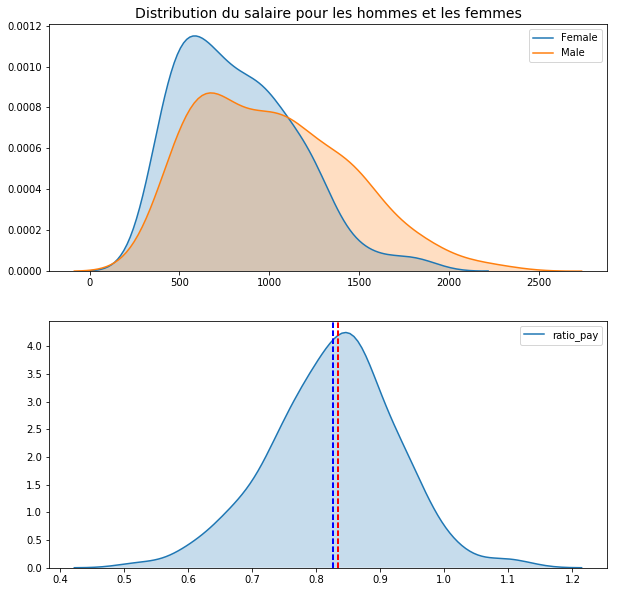

In [19]:
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
sns.kdeplot(df["F_weekly"],shade=True)
sns.kdeplot(df["M_weekly"],shade=True)
plt.legend(["Female","Male"])
plt.title("Distribution du salaire pour les hommes et les femmes",size=14)

plt.subplot(2,1,2)
sns.kdeplot(df["ratio_pay"],shade=True)
plt.axvline(df["ratio_pay"].mean(), linestyle="--",color='blue',linewidth=2)
plt.axvline(df["ratio_pay"].median(), linestyle='--', color='red',linewidth=2)

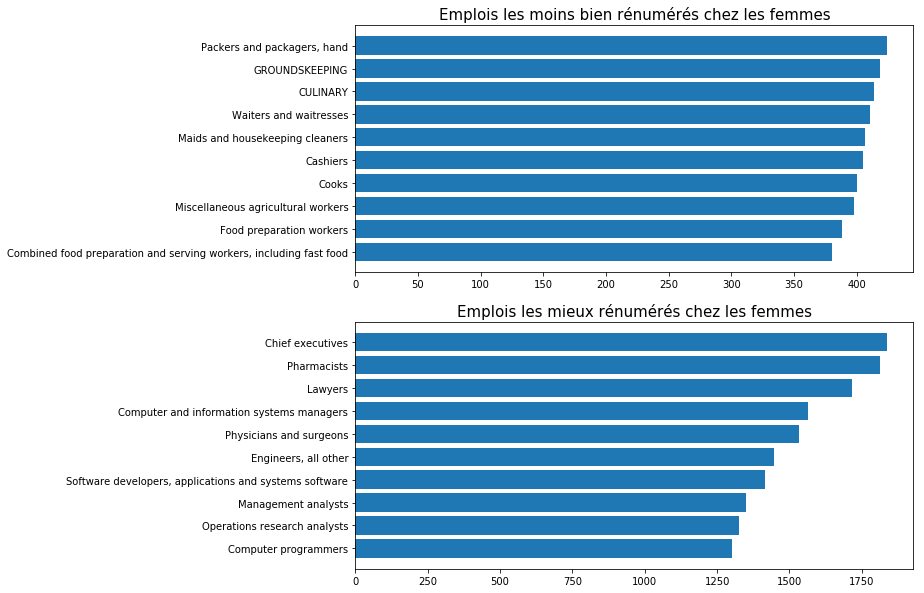

In [20]:
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
plt.barh(range(10),df["F_weekly"][0:10])
plt.yticks(range(10),df["Occupation"][0:10],fontsize=10)
plt.title("Emplois les moins bien rénumérés chez les femmes",fontsize=15)

plt.subplot(2,1,2)
plt.barh(range(10),df["F_weekly"][-10:])
plt.yticks(range(10),df["Occupation"][-10:],fontsize=10)
plt.title("Emplois les mieux rénumérés chez les femmes",fontsize=15)

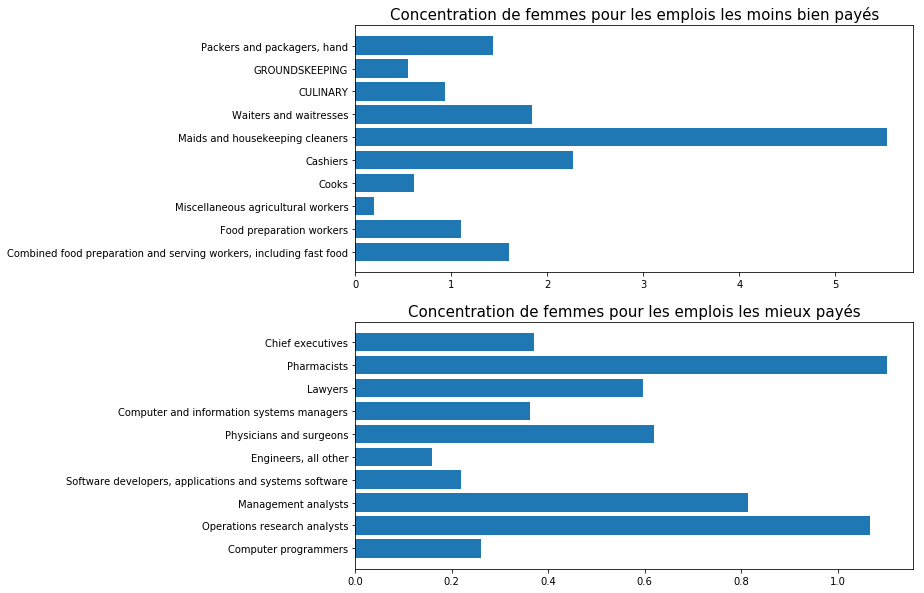

In [21]:
#Regardons maintenant la concentration de femmes dans les emploi les mieux/les moins bien payés

plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
plt.barh(range(10),df["ratio_nbr"][0:10])
plt.yticks(range(10),df["Occupation"][0:10],fontsize=10)
plt.title("Concentration de femmes pour les emplois les moins bien payés",fontsize=15)

plt.subplot(2,1,2)
plt.barh(range(10),df["ratio_nbr"][-10:])
plt.yticks(range(10),df["Occupation"][-10:],fontsize=10)
plt.title("Concentration de femmes pour les emplois les mieux payés",fontsize=15)



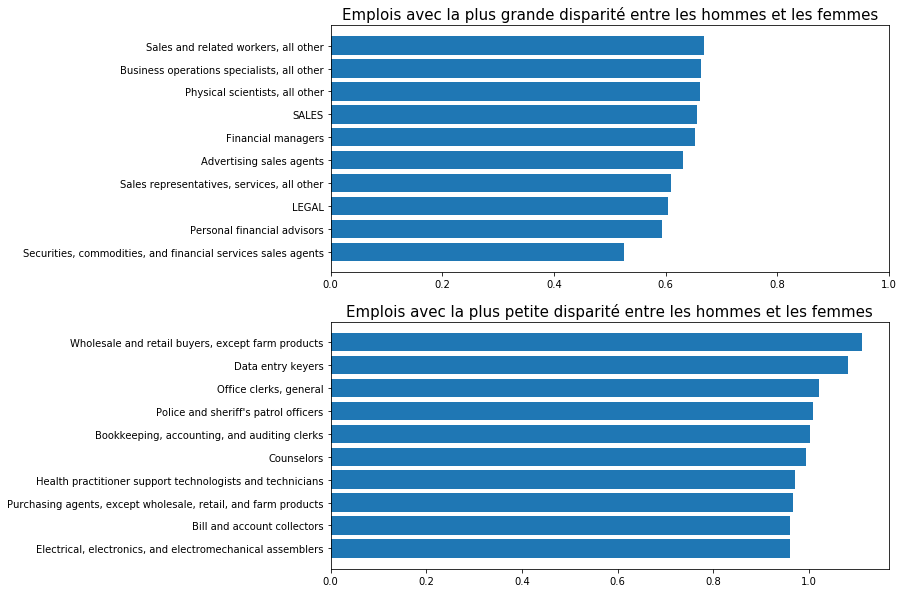

In [22]:
df_order=df.sort_values(by=["ratio_pay"],ascending=True)



plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
plt.barh(range(10),df_order["ratio_pay"][0:10])
plt.yticks(range(10),df_order["Occupation"][0:10],fontsize=10)
plt.title("Emplois avec la plus grande disparité entre les hommes et les femmes",fontsize=15)
plt.xlim(0,1)

plt.subplot(2,1,2)
plt.barh(range(10),df_order["ratio_pay"][-10:])
plt.yticks(range(10),df_order["Occupation"][-10:],fontsize=10)
plt.title("Emplois avec la plus petite disparité entre les hommes et les femmes",fontsize=15)

In [23]:
df["Median"]=(df["M_weekly"]+df["F_weekly"])/2
df["Gap"]=df["M_weekly"]-df["F_weekly"]
df["Fem_ratio"]=df["F_workers"]/df["All_workers"]


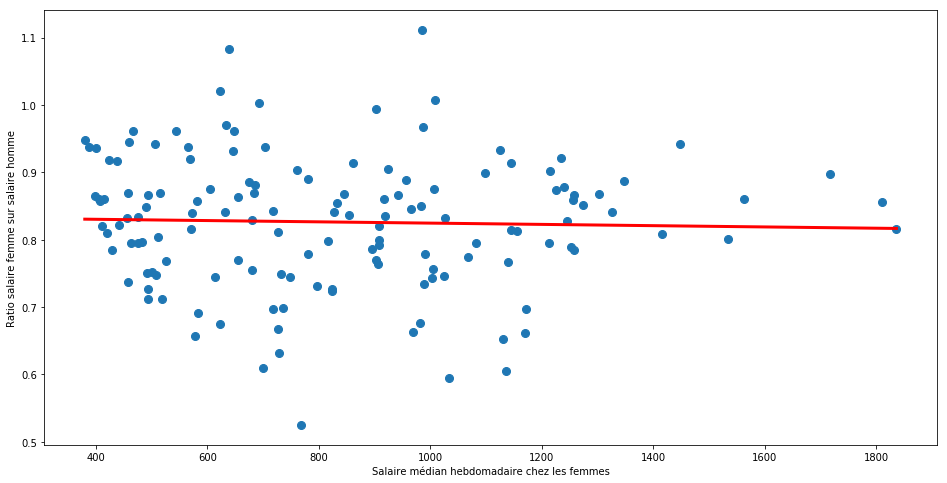

In [24]:
#Regardons maintenant sur un graphique
x=df["F_weekly"]
y=df["ratio_pay"]

b,m= polyfit(x,y,1)
plt.figure(figsize=(16,8))
plt.plot(x,y,"o",markersize=8)
plt.plot(x,b+m*x,color="r", linewidth=3.0)
plt.xlabel("Salaire médian hebdomadaire chez les femmes")
plt.ylabel("Ratio salaire femme sur salaire homme")

(0, 3)

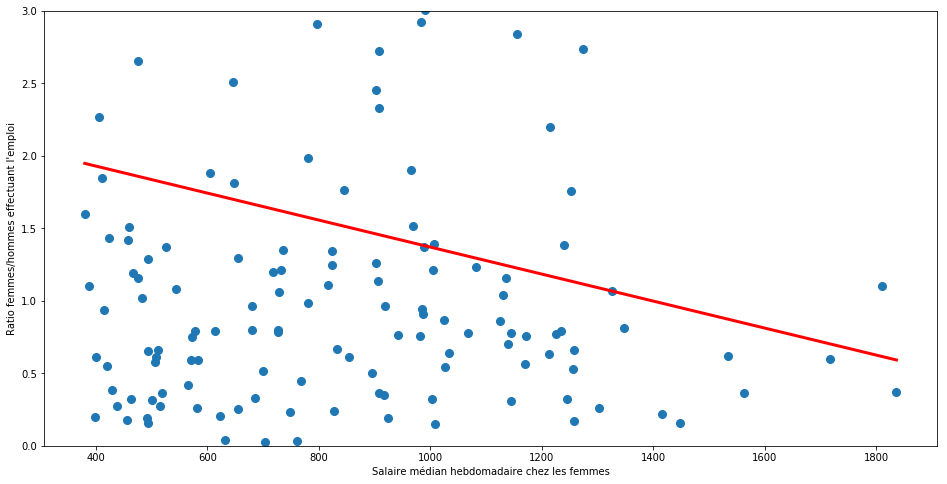

In [25]:
x=df["F_weekly"]
y=df["ratio_nbr"]

b,m= polyfit(x,y,1)
plt.figure(figsize=(16,8))
plt.plot(x,y,"o",markersize=8)
plt.plot(x,b+m*x,color="r", linewidth=3.0)
plt.xlabel("Salaire médian hebdomadaire chez les femmes")
plt.ylabel("Ratio femmes/hommes effectuant l'emploi")
plt.ylim(0,3)

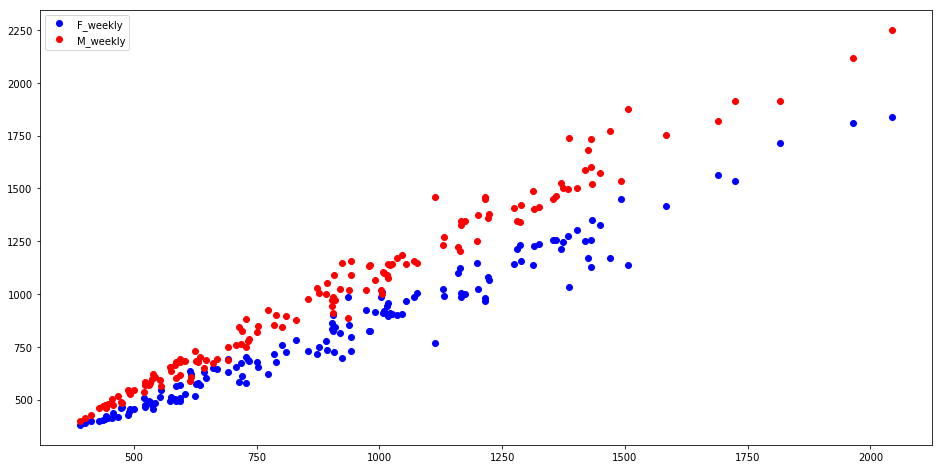

In [26]:
#Examinons maintenant la différence entre les hommes et les femmes
x=df["Median"]
y1=df["F_weekly"]
y2=df["M_weekly"]

plt.figure(figsize=(16,8))
plt.plot(x,y1,"o",color="b")
plt.plot(x,y2,"o",color="r")
plt.legend(loc="best")

In [28]:
#Examinons maintenant si les points soulevés permettent de prouver significativement que les femmes gagnent moins que 
#les hommes

df_fem=pd.DataFrame()
df_male=pd.DataFrame()

df_fem["Gender"]=np.ones(len(df))
df_male["Gender"]=np.zeros(len(df))

df_fem["Share"]=df["Fem_ratio"]
df_male["Share"]=df["Fem_ratio"]

df_fem["Salary"]=df["F_weekly"]
df_male["Salary"]=df["M_weekly"]

df_fem["Median"]=df["Median"]
df_male["Median"]=df["Median"]

df_regression=df_fem.append(df_male)

#Effectuons maintenant la régression

X_columns=["Gender","Share","Median"]
X=df_regression[X_columns]
X=sm.add_constant(X)
y=df_regression["Salary"]
ols_model=sm.OLS(y,X)
ols_results=ols_model.fit()
print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     2361.
Date:                Sat, 22 Sep 2018   Prob (F-statistic):          2.14e-198
Time:                        16:29:11   Log-Likelihood:                -1626.4
No. Observations:                 284   AIC:                             3261.
Df Residuals:                     280   BIC:                             3275.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         95.0317     17.391      5.465      0.0

3.73052950034e-11


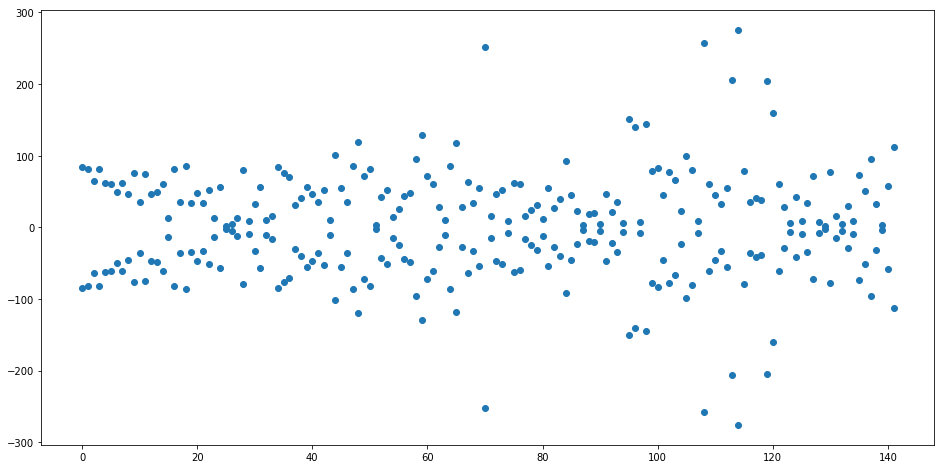

In [34]:
plt.figure(figsize=(16,8))
plt.plot(ols_results.resid,"o")
print(np.mean(ols_results.resid))
